In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [70]:
def plot_relation(x,y,kind = 'scatter'):
    fig, ax = plt.subplots()
    if kind == 'bar':
        ax.bar(x,y)
    if kind == 'scatter':
        ax.scatter(x,y, s = 5)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

## Let's plot the relation between each independent variable and the output variable (MEDV)

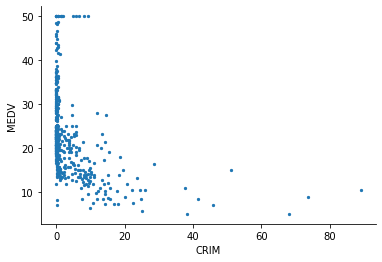

In [43]:
#CRIM: per capita crime rate by town

plot_relation(df.CRIM,df.MEDV)

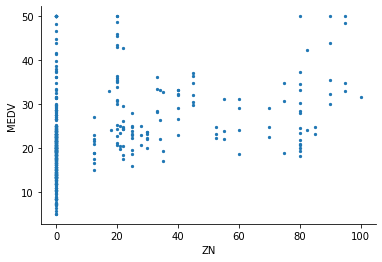

In [75]:
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

plot_relation(df.ZN, df.MEDV)

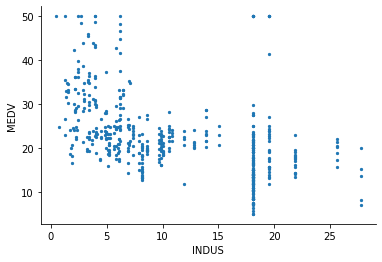

In [45]:
# INDUS: proportion of non-retail business acres per town

plot_relation(df.INDUS,df.MEDV)

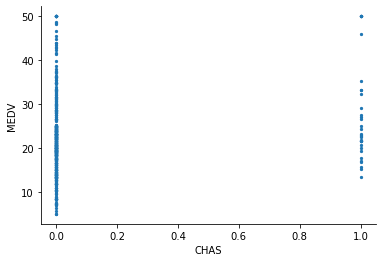

In [77]:
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

plot_relation(df.CHAS,df.MEDV)

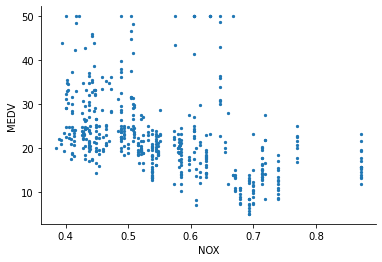

In [47]:
# NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
plot_relation(df.NOX,df.MEDV)

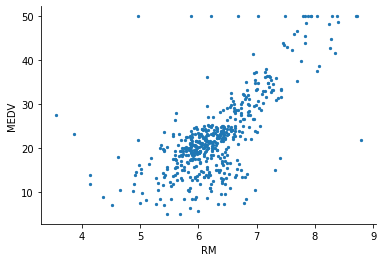

In [48]:
# RM: average number of rooms per dwelling
plot_relation(df.RM, df.MEDV)

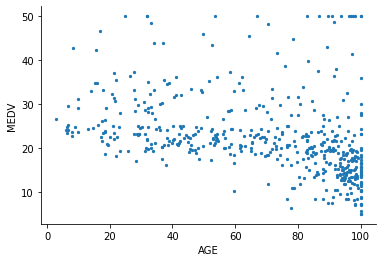

In [49]:
# AGE: proportion of owner-occupied units built prior to 1940
plot_relation(df.AGE, df.MEDV)

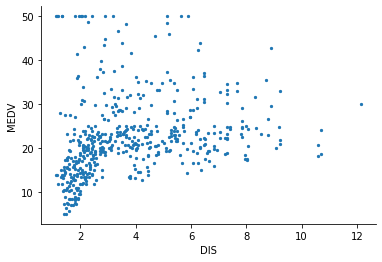

In [50]:
#DIS: weighted distances to five Boston employment centres
plot_relation(df.DIS, df.MEDV)

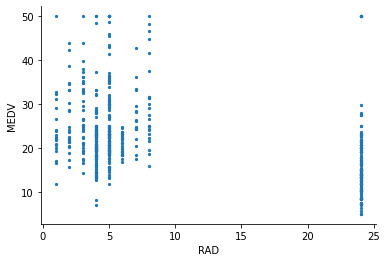

In [51]:
# RAD: index of accessibility to radial highways
plot_relation(df.RAD,df.MEDV)

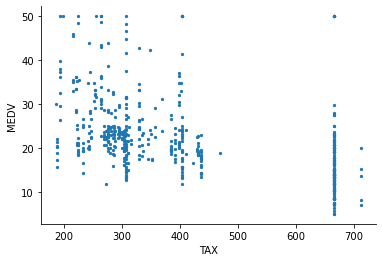

In [53]:
# TAX: full-value property-tax rate per $10,000 [$/10k]
plot_relation(df.TAX,df.MEDV)

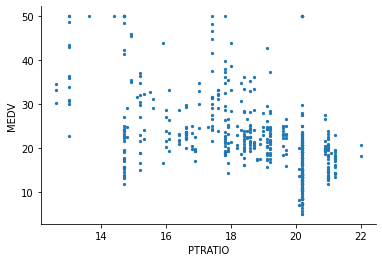

In [54]:
# PTRATIO: pupil-teacher ratio by town
plot_relation(df.PTRATIO,df.MEDV)

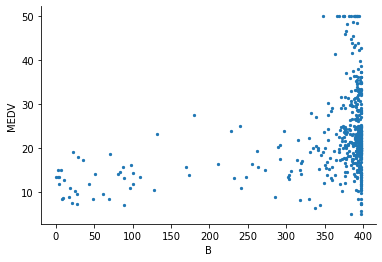

In [55]:
# B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

plot_relation(df.B,df.MEDV)

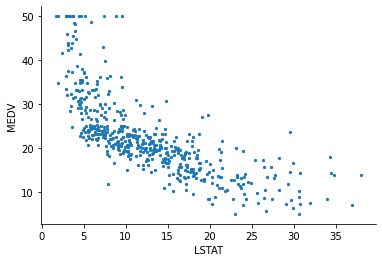

In [57]:
# LSTAT: % lower status of the population
plot_relation(df.LSTAT,df.MEDV)

In [110]:
def mean(X):
    mean = 0
    for x in X:
        mean = mean + x
    mean = mean/len(X)
    return mean

def covariance(X,Y):
    cov = 0
    for x,y in zip(X,Y):
        cov = cov + (x - mean(X))*(y-mean(Y))
    cov = cov/len(X)
    return cov

def variance(X):
    return covariance(X,X)

def standard_deviation(X):
    return variance(X)**(1/2)

def correlation(X,Y):
    return covariance(X,Y)/(standard_deviation(X)*standard_deviation(Y))

print(correlation(df.LSTAT,df.MEDV))
print(df.LSTAT.corr(df.MEDV))


-0.7376627261740144
-0.737662726174015


In [117]:
list_features = df.keys().to_list()[:-1]
list_correlations = []
for x in list_features:
    list_correlations.append(correlation(df[x],df.MEDV))
correlations = dict(zip(list_features,list_correlations))






<BarContainer object of 13 artists>

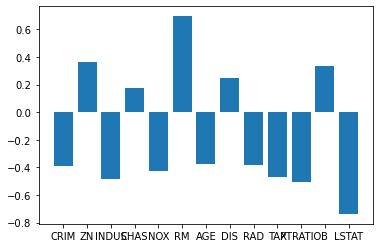

In [126]:
plt.bar(correlations.keys(),correlations.values())